In [4]:
class Astar():
    def __init__(self,maze_list,Heuristic):
        self.maze_list=maze_list
        self.Heuristic=Heuristic

    def find_path(self, end_node,f):
        el = end_node
        path = []
        while (el != np.inf):
            path.append(el)
            el = f[int(el)]
        return path

    def create_graph(self,world_mat):
        N = world_mat.shape[0]
        graph = []
        for i in range(N):
            for j in range(N):
                neigh = []
                if (i != N - 1):
                    if (world_mat[i + 1, j] == 0):
                        neigh.append(N * (i + 1) + j)
                if (i != 0):
                    if (world_mat[i - 1, j] == 0):
                        neigh.append(N * (i - 1) + j)
                if (j != N - 1):
                    if (world_mat[i, j + 1] == 0):
                        neigh.append(N * i + j + 1)
                if (j != 0):
                    if (world_mat[i, j - 1] == 0):
                        neigh.append(N * i + j - 1)

                graph.append(neigh)

        cost = np.ones([N * N, N * N]) * np.inf

        for i in range(N * N):
            for j in graph[i]:
                cost[i, j] = 1

        return graph, cost

    def display_result(self,world_mat, path):
        N = world_mat.shape[0]
        display_mat = world_mat.copy()
        for el in path:
            display_mat[convert_to_matrixindex(el, N)] = 5
        plt.matshow(display_mat, cmap='Greys')

    def forward(self):
        for heuristic in self.Heuristic.keys():
            func = self.Heuristic[heuristic]['funcs']
            equa = self.Heuristic[heuristic]['equa']
            print("-------------------------------------------")
            print("By using Astar method with {} :{}:".format(heuristic,equa))
            print("-------------------------------------------")
            for i in range(3):
                N = self.maze_list[i].shape[0]
                graph, cost = self.create_graph(self.maze_list[i])
                OPEN = []
                UPPER = np.inf
                d = np.ones([N * N]) * np.inf
                f = np.ones([N * N]) * np.inf
                CLOSE = []
                v = np.zeros([N * N])
                h = func(np.zeros([N * N]),N)
                V = []
                d[0] = 0
                w = 0
                OPEN.append(0)
                while OPEN != []:
                    w = w + 1
                    a = OPEN[0]
                    CLOSE.append(a)
                    OPEN.remove(a)
                    for ch in graph[a]:
                        if (ch not in CLOSE) and (cost[a, ch] + d[a] < d[ch]):
                            d[ch] = cost[a, ch] + d[a]
                            f[ch] = a
                            v[ch] = d[ch] + h[ch]
                            if ch == N * N - 1:
                                UPPER = d[ch]
                                break
                            if ch in OPEN:
                                t = OPEN.index(ch)
                                V.pop(t)
                                OPEN.remove(ch)
                            bisect.insort_left(V, v[ch])
                            OPEN.insert(V.index(v[ch]), ch)
                    if V != []:
                        V.pop(0)
                    if ch == N * N - 1:
                        break
                print("For maze", i, ":")
                print("The length of shortest path is:")
                print(UPPER)
                print("Nodes are tested:")
                print(w)
                pa = self.find_path(N * N - 1,f)
                self.display_result(self.maze_list[i], pa)
                plt.show()

In [5]:
def convert_to_matrixindex(a, N):
    i = int(a / N)
    j = int(a % N)
    return i, j

def No_heuristic(h, n):
    return h

def Manhattan_Distance(h, n):
    for i in range(n * n):
        x, y = convert_to_matrixindex(i, n)
        h[i] = 2 * n - 2 - x - y
    return h

def Euclidean_Distance(h, n):
    for i in range(n * n):
        x, y = convert_to_matrixindex(i, n)
        h[i] = 2 * n - 2 - x - y
        h[i] = np.sqrt((n-1-x)**2+(n-1-y)**2)
    return h

-------------------------------------------
By using Astar method with None :h(i,j)=0:
-------------------------------------------
For maze 0 :
The length of shortest path is:
130.0
Nodes are tested:
2171


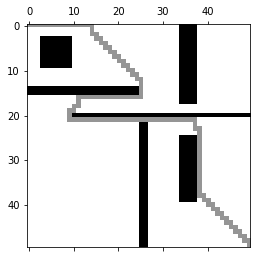

For maze 1 :
The length of shortest path is:
98.0
Nodes are tested:
2008


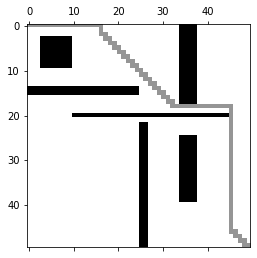

For maze 2 :
The length of shortest path is:
140.0
Nodes are tested:
2047


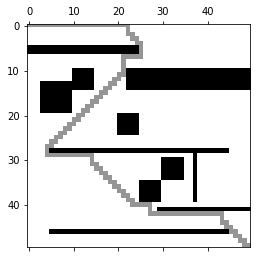

-------------------------------------------
By using Astar method with Manhattan Distance :h(i,j)=|i-goali|+|j-goalj|:
-------------------------------------------
For maze 0 :
The length of shortest path is:
130.0
Nodes are tested:
838


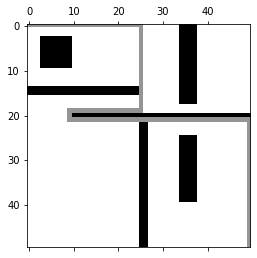

For maze 1 :
The length of shortest path is:
98.0
Nodes are tested:
98


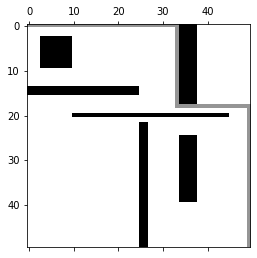

For maze 2 :
The length of shortest path is:
140.0
Nodes are tested:
1315


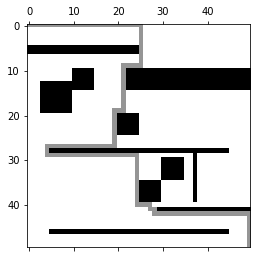

-------------------------------------------
By using Astar method with Euclidean Distance :h(i,j)=sqrt((i-goali)^2+(j-goalj)^2):
-------------------------------------------
For maze 0 :
The length of shortest path is:
130.0
Nodes are tested:
1985


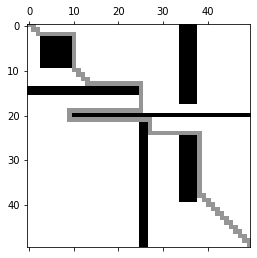

For maze 1 :
The length of shortest path is:
98.0
Nodes are tested:
737


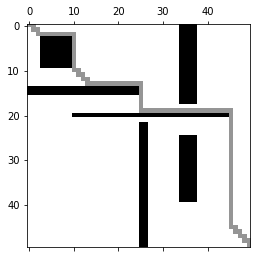

For maze 2 :
The length of shortest path is:
140.0
Nodes are tested:
1973


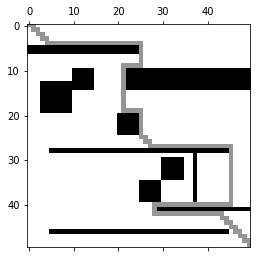

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
np.set_printoptions(precision=5, linewidth=120, suppress=True)
import bisect
import os

data_root='../data/HW1-2'
files=os.listdir(data_root)
maze_list = [np.load(os.path.join(data_root,file)) for file in files]
Heuristic={'None':{'funcs':No_heuristic,'equa':'h(i,j)=0'},
           'Manhattan Distance':{'funcs':Manhattan_Distance,'equa':'h(i,j)=|i-goali|+|j-goalj|'},
           'Euclidean Distance':{'funcs':Euclidean_Distance,'equa':'h(i,j)=sqrt((i-goali)^2+(j-goalj)^2)'},}
module=Astar(maze_list,Heuristic)
module.forward()